In [4]:
#*****************************Importing the required libraries**********************************
# Study dataset--Clean data--data analysis--correlation--machine learning and deep learning--model selection and save for future usage--model is ready for spark integration

# For linear algebra
import numpy as np
# For data processing and reading CSV file
import pandas as pd
# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#************************** load data and get first impression of the data************************************

In [6]:
# Loading the Data /Users/yiguo/Documents/Ryerson_500936757/Term4_CKME136/CapstoneProject/datasets
sourceFile1 = 'default_of_credit_card_clients_header.xls';
sourceFile3 = '../CapstoneProject/datasets/default_of_credit_card_clients_header.xls'
#sourceFile4 = '../datasets/default_of_credit_card_clients_header.xls'
#df = pd.read_excel (r'default_of_credit_card_clients_header.xls', header = 0)
df = pd.read_excel (sourceFile3, header = 0)
print (df.sample(5))
print ('_____________________________________________________________________')
# Finding the dimensions of the Data
print ('Dimension:')
print (df.shape)
print ('_____________________________________________________________________')
# Taking a peek at the data, checking data type and inspecting the data in statistical summary.
print ('Data information:')
print (df.info ())
print ('_____________________________________________________________________')
# Get statistical information.
print ('Discribe data:')
print (df.describe ())
# Checking missing values.
print ('Checking missing values:')
df.isnull().sum().sort_values(ascending = False)
print ('Result:')
print ('The total number of data is 30,000. The total number of features is 25. The target class is binary.') 
print ('There is no missing value. The data type of all the features is int64 and there no mismatching in there. There are 2 inconsistency existing in EDUCATION and MRRIAGE and need to be fixed.')

# Handling the 2 inconsistent variables.
# (1) With EDUCATION, find out the inconsistency values in numbers.
graduate = df ['EDUCATION'] [df['EDUCATION'] == 1]. count ()
university = df ['EDUCATION'] [df ['EDUCATION'] == 2]. count ()
high = df ['EDUCATION'] [df ['EDUCATION'] == 3]. count ()
other = df ['EDUCATION'] [df ['EDUCATION'] == 4]. count ()
five = df ['EDUCATION'] [df['EDUCATION'] == 5]. count ()
six = df ['EDUCATION'] [df['EDUCATION'] == 6]. count ()
zero = df ['EDUCATION'] [df['EDUCATION'] == 0]. count ()
total_education = graduate + university + high + other + five + six + zero
print ('grad_scholl', graduate)
print ('__________________')
print ('university', university)
print ('__________________')
print ('high_scholl', high)
print ('__________________')
print ('five', five)
print ('__________________')
print ('six', six)
print ('__________________')
print ('zero', zero)
print ('__________________')
print ('total_education', total_education)
# To deal with the inconsistency values, we reassign all of the value with "0", "5" and "6" in EDUCATION to "4".
df ['EDUCATION'] [df['EDUCATION'] == 0] = 4
df ['EDUCATION'] [df['EDUCATION'] == 5] = 4
df ['EDUCATION'] [df['EDUCATION'] == 6] = 4
# Now check the result.
graduate = df ['EDUCATION'] [df['EDUCATION'] == 1]. count ()
university = df ['EDUCATION'] [df ['EDUCATION'] == 2]. count ()
high = df ['EDUCATION'] [df ['EDUCATION'] == 3]. count ()
other = df ['EDUCATION'] [df ['EDUCATION'] == 4]. count ()
five = df ['EDUCATION'] [df['EDUCATION'] == 5]. count ()
six = df ['EDUCATION'] [df['EDUCATION'] == 6]. count ()
zero = df ['EDUCATION'] [df['EDUCATION'] == 0]. count ()
total_education_new = graduate + university + high + other + five + six + zero
print ('grad_scholl', graduate)
print ('__________________')
print ('university', university)
print ('__________________')
print ('high_scholl', high)
print ('__________________')
print ('five', five)
print ('__________________')
print ('six', six)
print ('__________________')
print ('zero', zero)
print ('__________________')
print ('total_education', total_education_new)
#(2) With MARRIAGE, find out he inconsistency in numbers.
married = df['MARRIAGE'] [df ['MARRIAGE'] == 1]. count ()
single = df['MARRIAGE'] [df['MARRIAGE'] == 2]. count () 
other_m = df['MARRIAGE'] [df['MARRIAGE'] == 3]. count ()
zero_m = df['MARRIAGE'] [df['MARRIAGE'] == 0]. count ()
total_marriage = married + single + other_m + zero_m
print ('married', married)
print ('________________')
print ('single', single)
print ('________________')
print ('other_m', other_m)
print ('________________')
print ('zero', zero)
print ('________________')
print ('total_marriage', total_marriage)
# Again, to deal with the inconsistency values, we reassign all of the value with 0 into 3, others.
df ['MARRIAGE'] [df['MARRIAGE'] == 0] = 3
# Now check the result.
married = df['MARRIAGE'] [df ['MARRIAGE'] == 1]. count ()
single = df['MARRIAGE'] [df['MARRIAGE'] == 2]. count () 
other_m = df['MARRIAGE'] [df['MARRIAGE'] == 3]. count ()
zero_m = df['MARRIAGE'] [df['MARRIAGE'] == 0]. count ()
total_marriage_new = married + single + other_m + zero_m
print ('married', married)
print ('________________')
print ('single', single)
print ('________________')
print ('other_m', other_m)
print ('________________')
print ('zero', zero)
print ('________________')
print ('total_marriage', total_marriage_new)
# (3) With 'PAY_", correct 'PAY_0' into 'PAY_1'.
df.rename (columns =  {'PAY_0':'PAY_1'}, inplace = True)
# According to the documentation of the dataset, all the values of this feature range from 0 to 9. So adjust 
# the values below '1' into '0'.
adj1 = df.PAY_1 < 1
df.loc[adj1, 'PAY_1'] = 0
adj2 = df.PAY_2 < 1
df.loc[adj1, 'PAY_2'] = 0
adj3 = df.PAY_1 < 1
df.loc[adj1, 'PAY_3'] = 0
adj4 = df.PAY_4 < 1
df.loc[adj1, 'PAY_4'] = 0
adj5 = df.PAY_5 < 1
df.loc[adj1, 'PAY_5'] = 0
adj6 = df.PAY_6 < 1
df.loc[adj1, 'PAY_6'] = 0
#df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()
# (4) The column name of 'default payment next month' is too long, so rename it.
df.rename (columns =  {'default payment next month':'default_pay'}, inplace = True)

# Check the results.
print ('New data information:')
print(df.info())
print ('Result: ')
print ('Now, there is no inconsistent variables any more and all of the attributes names are proper.')

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
21708  21709     230000    2          2         2   23      1      3      2   
3147    3148      50000    2          2         2   21     -1     -1     -1   
4546    4547     220000    2          1         1   24      2      3      2   
11260  11261      20000    2          3         1   54      0      0      2   
14049  14050     100000    2          1         1   45      1     -1     -1   

       PAY_4             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
21708      2             ...                  31053      30334      38203   
3147      -1             ...                    797       1166          0   
4546       2             ...                 183890     179764     181627   
11260      0             ...                   8028       9510       8815   
14049     -2             ...                      0          0          0   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_A

In [7]:
#****************************************** initial analysis************************************************

# Univiriable Analysis

SEX:
2    18112
1    11888
Name: SEX, dtype: int64
___________________
EDUCATION:
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
___________________
MARRIAGE:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
___________________
Description:
                SEX     EDUCATION      MARRIAGE
count  30000.000000  30000.000000  30000.000000
mean       1.603733      1.842267      1.557267
std        0.489129      0.744494      0.521405
min        1.000000      1.000000      1.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      4.000000      3.000000
____________________________________________________________________
default_pay bar plot:
   default_pay  values
0            0   23364
1            1    6636
___________________
SEX bar plot:
   SEX  values
0    2   18112
1    1   11888
___________________
EDUCATION bar plot:
   EDUCA

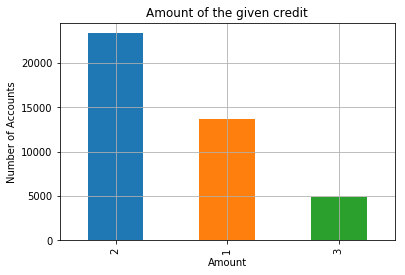

In [8]:
#****************************Option 1.  Merging all of the initial analysis************************************

# Univiriable Analysis

# For three categorical values, SEX, EDUCATION, MARRIAGE, we'll check how they are devided and if there are any sparse
# classes may cause problems in the following steps.
print ('SEX:')
print (df.SEX.value_counts ())
print ('___________________')
print ('EDUCATION:')
print (df.EDUCATION.value_counts ())
print ('___________________')
print ('MARRIAGE:')
print (df.MARRIAGE.value_counts ())
print ('___________________')
# Categorical variables description
print ('Description:')
print (df[['SEX', 'EDUCATION', 'MARRIAGE']].describe())
# Result: In EDUCATION, the mean is 1.85, the 25% quatile is 1, and the 75% quatile is 2. So, more than 75% of credit 
# card holders are no lower than University level.

print ('____________________________________________________________________')

# Checking distributions.
# Let's show 'default_pay' distritution in bar plot.
df.default_pay.value_counts (). plot (kind = 'bar')
plt.xlabel ('Default Payment Next Month');plt.ylabel('Number of Accounts')
plt.title('Default Credit Card Clients\n (Default = 0, Not Default = 1)')
temp = df["default_pay"].value_counts()
df1 = pd.DataFrame({'default_pay': temp.index,'values': temp.values})
print ('default_pay bar plot:')
print (df1)
print ('___________________')
# Let's show SEX distritution in bar plot.
df.SEX.value_counts (). plot (kind = 'bar')
plt.xlabel ('SEX');plt.ylabel('Number of Accounts')
plt.title('SEX\n (Male = 1, Female = 2)')
temp = df["SEX"].value_counts()
df2 = pd.DataFrame({'SEX': temp.index,'values': temp.values})
print ('SEX bar plot:')
print (df2)
print ('___________________')
# Let's show EDUCATION distritution in barh plot.
df.EDUCATION.value_counts ().plot (kind = 'bar')
plt.xlabel ('EDUCATION');plt.ylabel('Number of Accounts')
plt.title('EDUCATION\n (graduate school = 1; university = 2; high school = 3; others = 4)')
temp = df["EDUCATION"].value_counts()
df3 = pd.DataFrame({'EDUCATION': temp.index,'values': temp.values})
print ('EDUCATION bar plot:')
print (df3)
print ('___________________')
# Let's show MARRIAGE distritution in bar plot.
df.MARRIAGE.value_counts (). plot (kind = 'bar')
plt.xlabel ('MARRIAGE');plt.ylabel('Number of Accounts')
plt.title('MARRIAGE\n (married = 1; single = 2; others = 3)')
temp = df["MARRIAGE"].value_counts()
df4 = pd.DataFrame({'MARRIAGE': temp.index,'values': temp.values})
print ('MARRIAGE bar plot:')
print (df4)
print ('___________________')
# Show AGE distribution in histogram plot.
df.AGE.hist ()
plt.xlabel ('AGE');plt.ylabel('Number of Accounts')
print ('AGE histogram plot:')
plt.title('AGE')
# AGE description
df[['AGE']].describe()
print ('___________________')

# Amount of given credit, feature name: 'LIMIT_BAL'.
# To verify if it is a feature in large range.
print ('LIMIT_BAL range:')
print (df.LIMIT_BAL.value_counts().shape)
# There are 81 distinct values for amount of credit limit.
# To get more detailed sense, check the largest amount and smallest amount.
# print ('__________________')
print ('head', df ['LIMIT_BAL'].value_counts().head(5))
print ('tail', df ['LIMIT_BAL'].value_counts().tail(5))
# Show the amount of given credit distribution in histogram plot.
print ('LIMIT_BAL histogram plot')
df.LIMIT_BAL.hist ()
plt.xlabel ('Amount');plt.ylabel('Number of Accounts')
plt.title('Amount of the given credit')
# Bill Statement description
df[['LIMIT_BAL']].describe()
print ('___________________')

In [9]:
#****************************Option 2.  Seprating the initial analysis by steps********************************

In [10]:
# Option 2:
# For three categorical values, SEX, EDUCATION, MARRIAGE, we'll check how they are devided and if there are any sparse
# classes may cause problems in the following steps.
print ('SEX:')
print (df.SEX.value_counts ())
print ('___________________')
print ('EDUCATION:')
print (df.EDUCATION.value_counts ())
print ('___________________')
print ('MARRIAGE:')
print (df.MARRIAGE.value_counts ())
print ('___________________')
# Categorical variables description
print ('Description:')
print (df[['SEX', 'EDUCATION', 'MARRIAGE']].describe())
print ('______________________________________________________________')

print ('Result:') 
print ('In SEX, the mean is 1.6, which means there are more women than men in this dataset as credit card holders;') 
print ('In EDUCATION, the mean is 1.85, the 25% quatile is 1, and the 75% quatile is 2. So, more than 75% of credit card holders are no lower than University level;')
print ('In MARRIAGE, the mean is 1.55, which means married people more like have credit cards than people in single or other marriage status.')
print ('The bar plots of these three variables are shown as follows.')

SEX:
2    18112
1    11888
Name: SEX, dtype: int64
___________________
EDUCATION:
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
___________________
MARRIAGE:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
___________________
Description:
                SEX     EDUCATION      MARRIAGE
count  30000.000000  30000.000000  30000.000000
mean       1.603733      1.842267      1.557267
std        0.489129      0.744494      0.521405
min        1.000000      1.000000      1.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      4.000000      3.000000
______________________________________________________________
Result:
In SEX, the mean is 1.6, which means there are more women than men in this dataset as credit card holders;
In EDUCATION, the mean is 1.85, the 25% quatile is 1, and the 75% quatile is 2. So, more than 75% of credit c

SEX bar plot:
   SEX  values
0    2   18112
1    1   11888


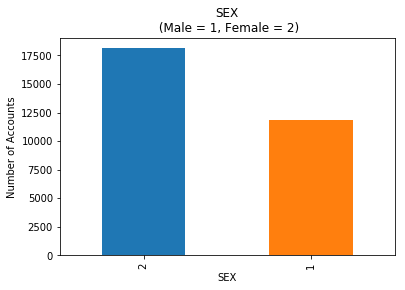

In [11]:
# Option 2:
# Let's show SEX distritution in bar plot.
df.SEX.value_counts (). plot (kind = 'bar')
plt.xlabel ('SEX');plt.ylabel('Number of Accounts')
plt.title('SEX\n (Male = 1, Female = 2)')
temp = df["SEX"].value_counts()
df2 = pd.DataFrame({'SEX': temp.index,'values': temp.values})
print ('SEX bar plot:')
print (df2)

EDUCATION bar plot:
   EDUCATION  values
0          2   14030
1          1   10585
2          3    4917
3          4     468


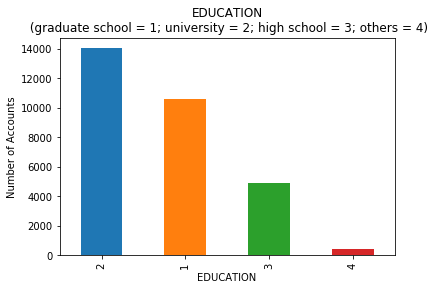

In [12]:
# Option 2:
# Let's show EDUCATION distritution in barh plot.
df.EDUCATION.value_counts ().plot (kind = 'bar')
plt.xlabel ('EDUCATION');plt.ylabel('Number of Accounts')
plt.title('EDUCATION\n (graduate school = 1; university = 2; high school = 3; others = 4)')
temp = df["EDUCATION"].value_counts()
df3 = pd.DataFrame({'EDUCATION': temp.index,'values': temp.values})
print ('EDUCATION bar plot:')
print (df3)

MARRIAGE bar plot:
   MARRIAGE  values
0         2   15964
1         1   13659
2         3     377


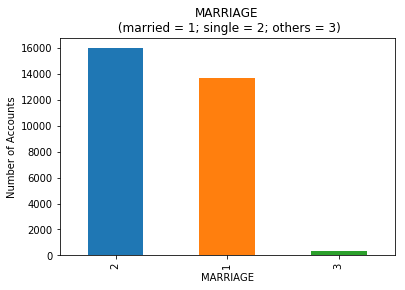

In [13]:
# Option 2:
# Let's show MARRIAGE distritution in bar plot.
df.MARRIAGE.value_counts (). plot (kind = 'bar')
plt.xlabel ('MARRIAGE');plt.ylabel('Number of Accounts')
plt.title('MARRIAGE\n (married = 1; single = 2; others = 3)')
temp = df["MARRIAGE"].value_counts()
df4 = pd.DataFrame({'MARRIAGE': temp.index,'values': temp.values})
print ('MARRIAGE bar plot:')
print (df4)

Describe AGE and show histogram plot:
                AGE
count  30000.000000
mean      35.485500
std        9.217904
min       21.000000
25%       28.000000
50%       34.000000
75%       41.000000
max       79.000000
Result:
The mean of AGE is 35, the min is 21, and the max is 79. This dataset covers people with a broad range.


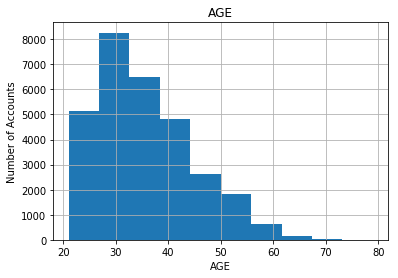

In [14]:
# Option 2:
# Show AGE distribution in histogram plot.
df.AGE.hist ()
plt.xlabel ('AGE');plt.ylabel('Number of Accounts')
print ('Describe AGE and show histogram plot:')
plt.title('AGE')
# AGE description
print (df[['AGE']].describe())

print ('Result:')
print ('The mean of AGE is 35, the min is 21, and the max is 79. This dataset covers people with a broad range.')

LIMIT_BAL range:
(81,)
head 50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64
tail 800000     2
760000     1
690000     1
1000000    1
327680     1
Name: LIMIT_BAL, dtype: int64
Describe LIMIT_BAL and show histogram plot:
Result:
Feature “LIMIT_BALL” is in a broad range and not normally distributed. The average amount of credit limit is 167,484 and the 50% quatile amount is 140,000, which means more amount of credit limit is assigned to less card holders.


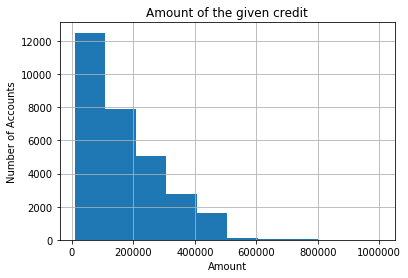

In [16]:
# Option 2:
# Amount of given credit, feature name: 'LIMIT_BAL'.
# To verify if it is a feature in large range.
print ('LIMIT_BAL range:')
print (df.LIMIT_BAL.value_counts().shape)
# There are 81 distinct values for amount of credit limit.
# To get more detailed sense, check the largest amount and smallest amount.
# print ('__________________')
print ('head', df ['LIMIT_BAL'].value_counts().head(5))
print ('tail', df ['LIMIT_BAL'].value_counts().tail(5))
# Show the amount of given credit distribution in histogram plot.
print ('Describe LIMIT_BAL and show histogram plot:')
df.LIMIT_BAL.hist ()
plt.xlabel ('Amount');plt.ylabel('Number of Accounts')
plt.title('Amount of the given credit')
# Bill Statement description
df[['LIMIT_BAL']].describe()

print ('Result:')
print ('Feature “LIMIT_BALL” is in a broad range and not normally distributed. The average amount of credit limit is 167,484 and the 50% quatile amount is 140,000, which means more amount of credit limit is assigned to less card holders.')

Text(0.5, 1.0, 'The Payment Status in September, 2005')

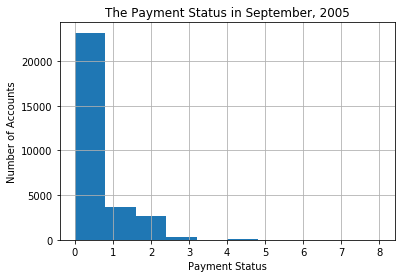

In [19]:
# Option 2:
# Show histograms for 'PAY_1'
df_PAY1 = df['PAY_1']
df_PAY1.describe ()
df_PAY1.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in September, 2005')

Text(0.5, 1.0, 'The Payment Status in August, 2005')

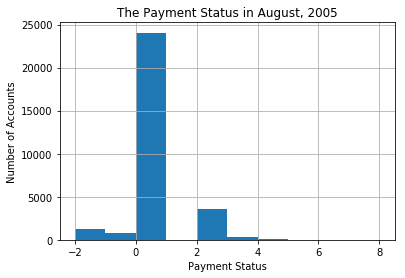

In [21]:
# Option 2:
# Show histograms for 'PAY_2'
df_PAY2 = df['PAY_2']
df_PAY2.describe ()
df_PAY2.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in August, 2005')

Text(0.5, 1.0, 'The Payment Status in July, 2005')

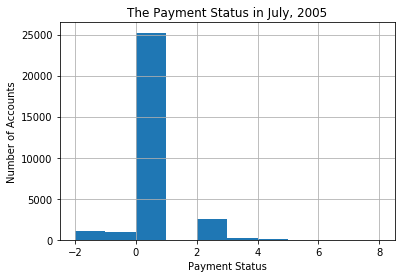

In [22]:
# Option 2:
# Show histograms for 'PAY_3'
df_PAY3 = df['PAY_3']
df_PAY3.describe ()
df_PAY3.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in July, 2005')

Text(0.5, 1.0, 'The Payment Status in June, 2005')

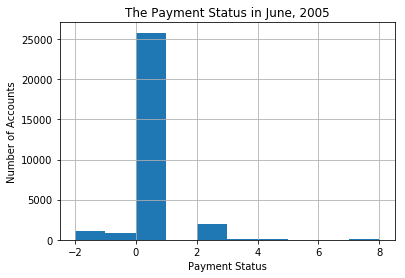

In [216]:
# Option 2:
# Show histograms for 'PAY_3'df_PAY4 = df['PAY_4']
df_PAY4.describe ()
df_PAY4.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in June, 2005')

Text(0.5, 1.0, 'The Payment Status in May, 2005')

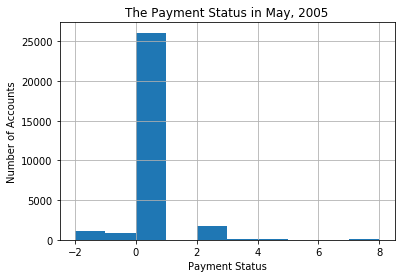

In [23]:
# Option 2:
# Show histograms for 'PAY_5'
df_PAY5 = df['PAY_5']
df_PAY5.describe ()
df_PAY5.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in May, 2005')

Text(0.5, 1.0, 'The Payment Status in April, 2005')

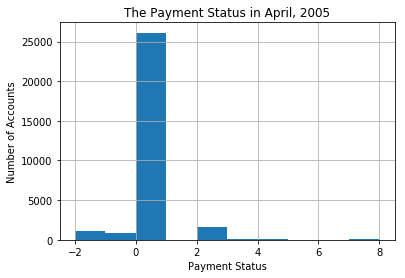

In [24]:
# Option 2:
# Show histograms for 'PAY_6'
df_PAY6 = df['PAY_6']
df_PAY6.describe ()
df_PAY6.hist ()
plt.xlabel ('Payment Status');plt.ylabel('Number of Accounts')
plt.title('The Payment Status in April, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in September, 2005')

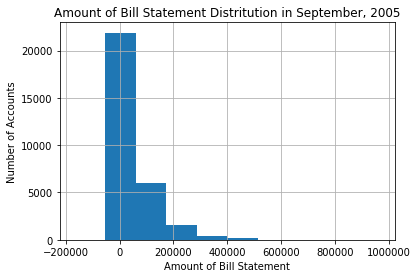

In [25]:
# Option 2:
# Show histograms for 'BILL_AMT1'
df_BILL_AMT1 = df['BILL_AMT1']
df_BILL_AMT1.describe ()
df_BILL_AMT1.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in September, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in August, 2005')

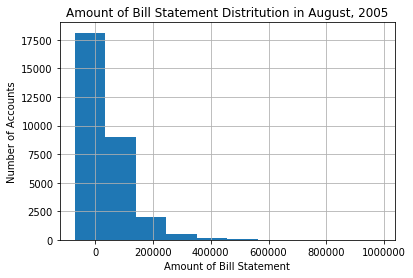

In [26]:
# Option 2:
# Show histograms for 'BILL_AMT2'
df_BILL_AMT2 = df['BILL_AMT2']
df_BILL_AMT2.describe ()
df_BILL_AMT2.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in August, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in July, 2005')

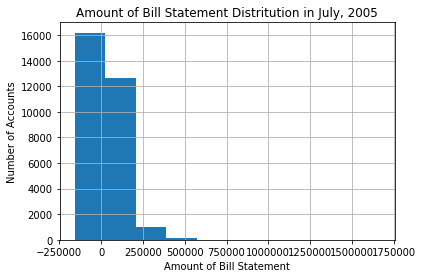

In [27]:
# Option 2:
# Show histograms for 'BILL_AMT3'
df_BILL_AMT3 = df['BILL_AMT3']
df_BILL_AMT3.describe ()
df_BILL_AMT3.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in July, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in June, 2005')

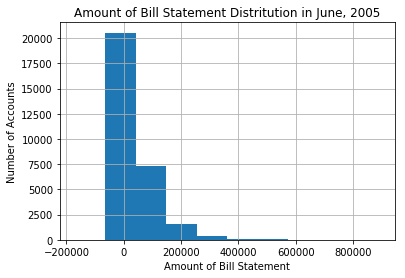

In [28]:
# Option 2:
# Show histograms for 'BILL_AMT4'
df_BILL_AMT4 = df['BILL_AMT4']
df_BILL_AMT4.describe ()
df_BILL_AMT4.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in June, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in May, 2005')

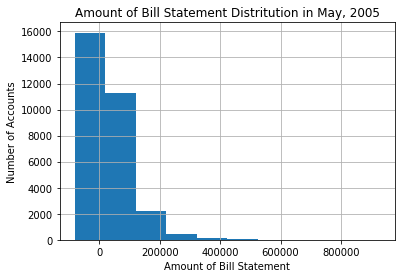

In [29]:
# Option 2:
# Show histograms for 'BILL_AMT5'
df_BILL_AMT5 = df['BILL_AMT5']
df_BILL_AMT5.describe ()
df_BILL_AMT5.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in May, 2005')

Text(0.5, 1.0, 'Amount of Bill Statement Distritution in April, 2005')

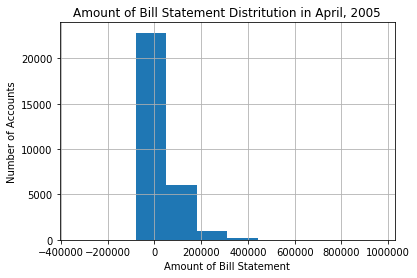

In [30]:
# Option 2:
# Show histograms for 'BILL_AMT6'
df_BILL_AMT6 = df['BILL_AMT6']
df_BILL_AMT6.describe ()
df_BILL_AMT6.hist ()
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title('Amount of Bill Statement Distritution in April, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in September, 2005')

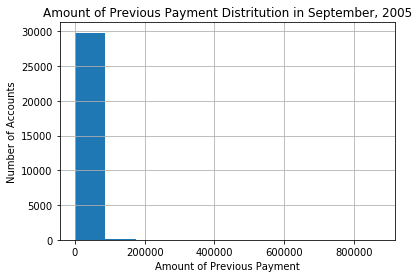

In [31]:
# Option 2:
# Show histograms for 'PAY_AMT1'
df_PAY_AMT1 = df['PAY_AMT1']
df_PAY_AMT1.describe ()
df_PAY_AMT1.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in September, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in August, 2005')

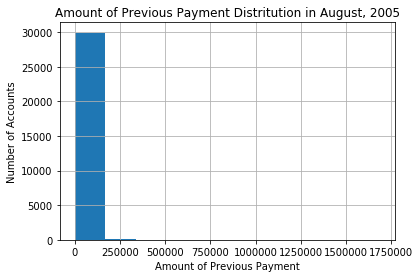

In [32]:
# Option 2:
# Show histograms for 'PAY_AMT2'
df_PAY_AMT2 = df['PAY_AMT2']
df_PAY_AMT2.describe ()
df_PAY_AMT2.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in August, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in July, 2005')

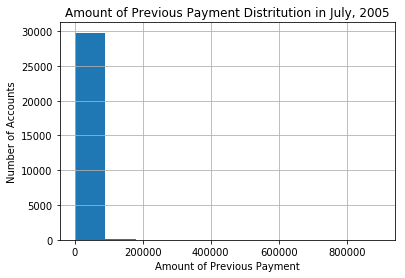

In [33]:
# Option 2:
# Show histograms for 'PAY_AMT3'
df_PAY_AMT3 = df['PAY_AMT3']
df_PAY_AMT3.describe ()
df_PAY_AMT3.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in July, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in June, 2005')

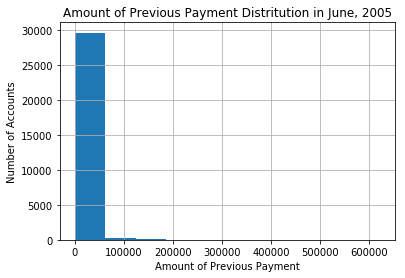

In [34]:
# Option 2:
# Show histograms for 'PAY_AMT4'
df_PAY_AMT4 = df['PAY_AMT4']
df_PAY_AMT4.describe ()
df_PAY_AMT4.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in June, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in May, 2005')

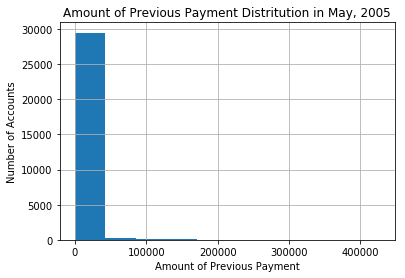

In [35]:
# Option 2:
# Show histograms for 'PAY_AMT5'
df_PAY_AMT5 = df['PAY_AMT5']
df_PAY_AMT5.describe ()
df_PAY_AMT5.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in May, 2005')

Text(0.5, 1.0, 'Amount of Previous Payment Distritution in April, 2005')

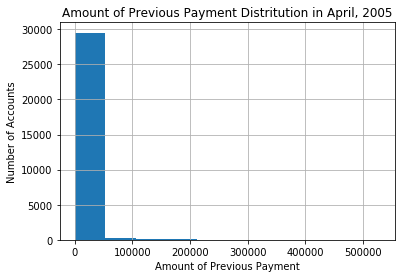

In [36]:
# Option 2:
# Show histograms for 'PAY_AMT6'
df_PAY_AMT6 = df['PAY_AMT6']
df_PAY_AMT6.describe ()
df_PAY_AMT6.hist ()
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title('Amount of Previous Payment Distritution in April, 2005')

In [43]:
# Option 2:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [38]:
# Option 2:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [45]:
# Option 2:
# Amount of given credit description
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


default_pay bar plot:
   default_pay  values
0            0   23364
1            1    6636
Result:
1. The target class, “default payment next month”, is biased with a number of 6,635 out of 30,000 (or 22%) of clients will default next month (only one out of four). Hence, accuracy score is not a good metric, while F1-score is a better indicator of classification models in such cases. In pattern recognition and information retrieval binary classification, F1-score is always to measure a model’s accuracy by using precision and the recall of the test. With this imbalanced dataset, F1-score is a more practical indicator than accuracy.
2. Since the size of observations is small, no feature selection and related correlation/ANOVA testing is needed in this work.


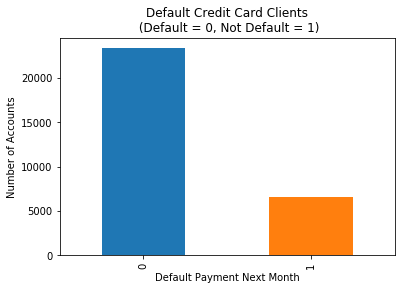

In [17]:
# Option 2:
# Let's show 'default_pay' distritution in bar plot.
df.default_pay.value_counts (). plot (kind = 'bar')
plt.xlabel ('Default Payment Next Month');plt.ylabel('Number of Accounts')
plt.title('Default Credit Card Clients\n (Default = 0, Not Default = 1)')
temp = df["default_pay"].value_counts()
df1 = pd.DataFrame({'default_pay': temp.index,'values': temp.values})
print ('default_pay bar plot:')
print (df1)
print ('Result:')
print ('1. The target class, “default payment next month”, is biased with a number of 6,635 out of 30,000 (or 22%) of clients will default next month (only one out of four). Hence, accuracy score is not a good metric, while F1-score is a better indicator of classification models in such cases. In pattern recognition and information retrieval binary classification, F1-score is always to measure a model’s accuracy by using precision and the recall of the test. With this imbalanced dataset, F1-score is a more practical indicator than accuracy.')
print ('2. Since the size of observations is small, no feature selection and related correlation/ANOVA testing is needed in this work.')

In [27]:
#************************************* Bivariable Analysis *****************************************************

default_pay    0    1       pct
AGE                            
21            53   14  0.208955
22           391  169  0.301786
23           684  247  0.265306
24           827  300  0.266193
25           884  302  0.254637
Credit card holder at about 30 years old are the majority portion of the whole and they tend to default as well.


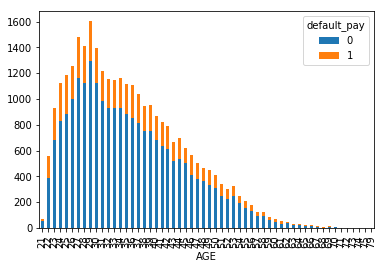

In [18]:
# AGE and DEFAULT_PAY
# Create a crosstable named 'age', combining AGE, default_pay and the percentage.
age = pd.crosstab (df.AGE, df.default_pay)
age.plot(kind='bar', stacked = True)
age ['pct'] = (age[1]/(age[0] + age[1])) 
print (age. head())
print ('Credit card holder at about 30 years old are the majority portion of the whole and they tend to default as well.')

Result:
The probability of man to be default is greater than that of woman.


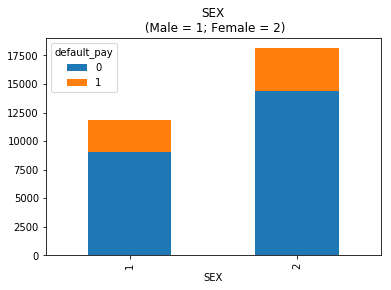

In [21]:
# SEX and DEFAULT_PAY
# Create a crosstable named 'gender', combining SEX, default_pay and the percentage.
gender = pd.crosstab (df.SEX, df.default_pay)
gender.plot(kind='bar', stacked = True)
gender['pct'] = (gender[1]/(gender[0] + gender[1])) 
gender
plt.title ('SEX\n (Male = 1; Female = 2)')

print ('Result:')
print ('The probability of man to be default is greater than that of woman.')

Result:
Without considering the unknown class “others”, education degree has positive impact with the possibility of default.


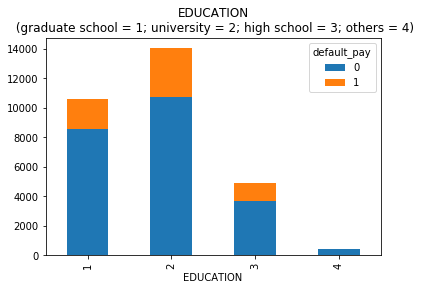

In [22]:
# EDUCATION and DEFAULT_PAY 
# Create a crosstable named 'education', combining EDUCATION, default_pay and the percentage.
education = pd.crosstab (df.EDUCATION, df.default_pay)
education.plot(kind='bar', stacked = True)
education['pct'] = (education[1]/(education[0] + education[1])) 
education
plt.title('EDUCATION\n (graduate school = 1; university = 2; high school = 3; others = 4)')

print ('Result:')
print ('Without considering the unknown class “others”, education degree has positive impact with the possibility of default.')

Result:
Roughly, the possibilities of default of any marriage status are close, with single people have less possibility to be default than the other two types people.


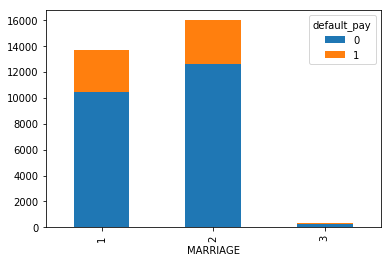

In [23]:
# MARRIAGE and DEFAULT_PAY
# Create a crosstable named 'marriage', combining MARRIAGE, default_pay and the percentage.
marriage = pd.crosstab (df.MARRIAGE, df.default_pay)
marriage.plot(kind='bar', stacked = True)
marriage['pct'] = (marriage[1]/(marriage[0] + marriage[1])) 
marriage
print ('Result:')
print ('Roughly, the possibilities of default of any marriage status are close, with single people have less possibility to be default than the other two types people.')

In [31]:
#**************************************** Multivariate Analysis and Feature Selection **************************
# Correlation
# Interpretation the absolute value of correlation: 
# .00-.19 very weak; 
# .20-.39 weak; 
# .40-.59 moderate; 
# .60-.79 strong; 
# .80-1.0 very strong.

   SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1
5    1          1         2
6    1          1         2
7    2          2         2
8    2          3         1
9    1          3         2
Result:
There is no correlation between either of the two variables.


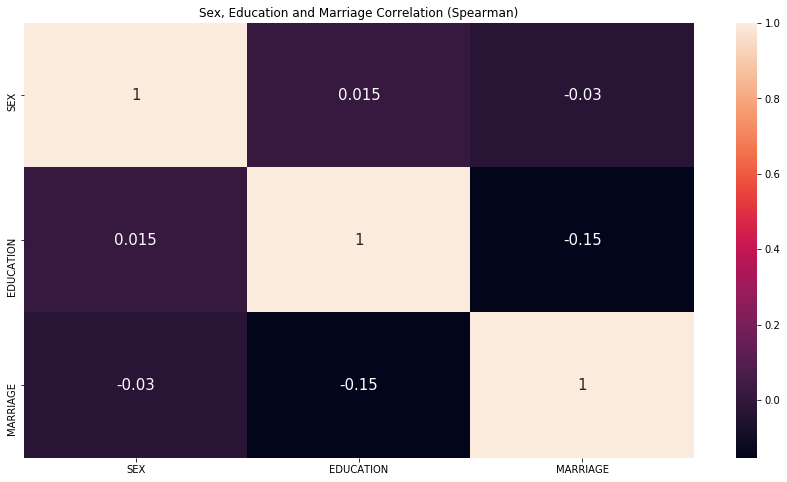

In [24]:
# Correlation of SEX, EDUCATION, and MARRIAGE
# Create a subset 'sex_edu_marr', combining the 3 variables. 
sex_edu_marr = df [['SEX', 'EDUCATION', 'MARRIAGE']]
print (sex_edu_marr.head(10))
# Find out the distribution of the 4 variables.
#sex_edu_marr.boxplot ()
#plt.show()
#plt.title ('Fig.13 : Sex, Education and Marriage Boxplot',fontweight = "bold", size = 12)
# The 3 variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_sex_edu_marr = sex_edu_marr.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_sex_edu_marr, annot=True, annot_kws={"size": 15})
plt.title ('Sex, Education and Marriage Correlation (Spearman)')
print ('Result:')
print ('There is no correlation between either of the two variables.')

Result:
There is very strong correlation between PAY_3 and PAY_4, between PAY_4 and PAY_3, between PAY_5 and PAY_4, and between PAY_6 and PAY_4.
There is strong correlation between PAY_2 and PAY_1, between PAY_3 and PAY_2, between PAY_4 and PAY_2, between PAY_5 and PAY_2, and between PAY_6 and PAY_2.
So we will remove PAY_4, PAY_5 in the model training process.


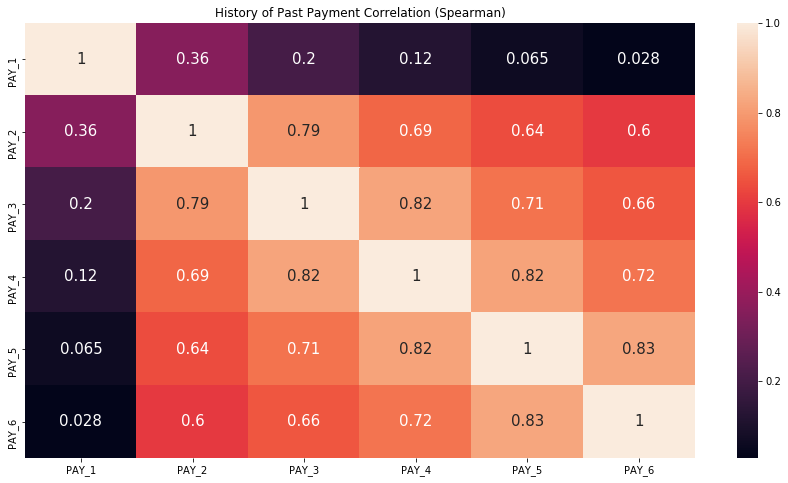

In [31]:
# Correlation of past payment history, feature name: 'PAY_'
# Subset a dataframe named 'subset_pay', combining 6 'PAY_' variables.
subset_late = df[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
subset_late.head ()
# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_late = subset_late.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_late, annot=True, annot_kws={"size": 15})
plt.title ('History of Past Payment Correlation (Spearman)')

print ('Result:')
print ('There is very strong correlation between PAY_3 and PAY_4, between PAY_4 and PAY_3\5, between PAY_5 and PAY_4\6, and between PAY_6 and PAY_4\5.')
print ('There is strong correlation between PAY_2 and PAY_1\4\5\6, between PAY_3 and PAY_2\5\6, between PAY_4 and PAY_2\6, between PAY_5 and PAY_2\3, and between PAY_6 and PAY_2\3.')
print ('So we will remove PAY_4, PAY_5 in the model training process.')

Result:
It’s safe to say the correlation among the “BILL_AMT” feature set is averagely strong, and correlation is decreasing with distance between months. Lowest correlations are between Sept and April.
The correlarions between either of the variables are strong and between the adjacent two are very strong, so we will remove one of the each pair of the correlation value greater than 0.9, which would be BILL_AMT2 and BILL_AMT4.


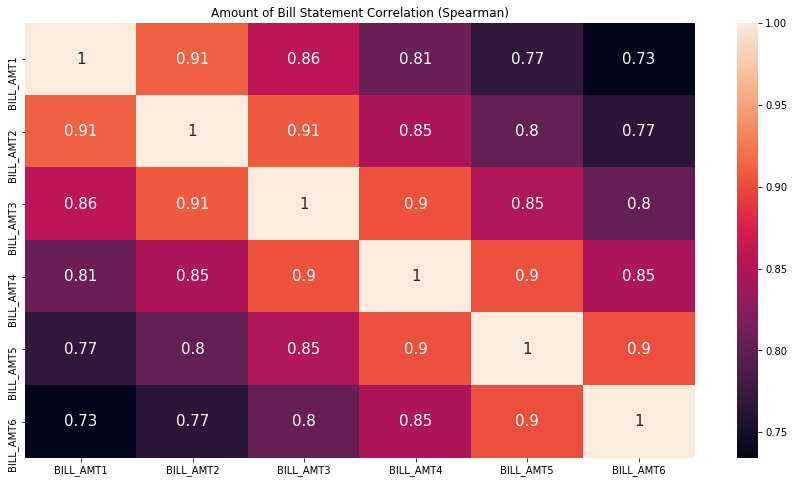

In [30]:
# Amount of bill statement, feature name: 'BILL_AMT'
# Subset a dataframe named 'subset_bill', combining 6 'BILL_AMT' variables.
subset_bill = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
subset_bill.head ()
# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_bill = subset_bill.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_bill, annot=True, annot_kws={"size": 15})
plt.title ('Amount of Bill Statement Correlation (Spearman)')

print ('Result:') 
print ('It’s safe to say the correlation among the “BILL_AMT” feature set is averagely strong, and correlation is decreasing with distance between months. Lowest correlations are between Sept and April.')
print ('The correlarions between either of the variables are strong and between the adjacent two are very strong, so we will remove one of the each pair of the correlation value greater than 0.9, which would be BILL_AMT2 and BILL_AMT4.')

There are moderate correlation among the “PAY_AMT” feature set.


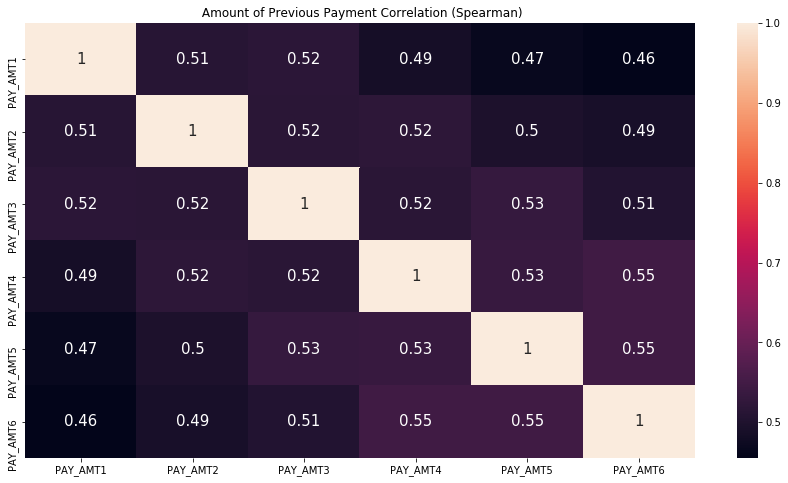

In [29]:
# Amount of previous payment, feature name: 'PAY_AMT'
# Subset a dataframe named 'subset_bill', combining 6 'PAY_AMT' variables.
subset_pay = df[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
subset_pay.head ()
# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_pay = subset_pay.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_pay, annot=True, annot_kws={"size": 15})
plt.title (' Amount of Previous Payment Correlation (Spearman)')

print ('There are moderate correlation among the “PAY_AMT” feature set.')

In [65]:
# Feature selection
# Based on the correlation analysis, create a new data frame, excluding PAY_4, PAY_5, BILL_AMT2, BILL_AMT4, and ID. 
df_featureSelected = df.drop (['ID', 'PAY_4', 'PAY_5', 'BILL_AMT2', 'BILL_AMT4'], axis=1)
print (df_featureSelected.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default_pay    30000 non-null int64
dtypes: int64(20)
memory usage: 4.6 MB
None


In [49]:
# Correlation of all of the features (NOT USE)

# Find out if it is normal distribution of all the variables.
# df.boxplot ()
# plt.show ()
#plt.title ('Fig.20 : Distribution of All the Features',fontweight = "bold", size = 12)
# The result shows: it's not normal distributed, so the spearman correlation is proper.
print('_________________________________________________________')

#corr_all = df.corr(method = 'spearman')
#top_corr_features = corr_all.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#plt.title ('Fig.20 : Correlation of All the Features',fontweight = "bold", size = 12)
# The result shows: there is no very strong correlation between either of the dependent variables 
# and the independent variabe.

_________________________________________________________


In [38]:
#*************************************** Exploratory Data Analysis *********************************************

In [66]:
# Normalization
# Create a new data frame to work with, excluding 'default_pay'. 
df_tem = df_featureSelected.drop (['default_pay'], axis=1)
print (df_tem.info ())
print('_________________________________________________________')
# Normalize the dataframe.
df_norm = (df_tem - df_tem.mean()) / (df_tem.max() - df_tem.min())

# Combine the target column 'default_pay' into the normalized dataset.
df_norm ['default_pay'] = df ['default_pay']
print (df_norm.head ())
print('_________________________________________________________')
default_count = df_norm['default_pay'] [(df_norm['default_pay'] == 1)].count ()
nondefault_count =df_norm['default_pay'] [(df_norm['default_pay'] == 0)].count ()
print('default:', default_count)
print('nondefault:', nondefault_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(19)
memory usage: 4.3 MB
None
_________________________________________________________
   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
0  -0.148974  0.396267   0.052578 -0.278633 -0.198026  0.205404  0

In [31]:
#************************************************* Modelling 

In [70]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
column_names = list(df_norm)
print(column_names)

# For full model with all features.
X_train, X_test, y_train, y_test = train_test_split(df_norm[column_names[0:18]], 
                                                    df_norm[column_names[19]], test_size=0.25, random_state=33)
print (y_train.value_counts())
print (y_test.value_counts())
print ('___________________________________________________________________')

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_pay']
0    17497
1     5003
Name: default_pay, dtype: int64
0    5867
1    1633
Name: default_pay, dtype: int64
___________________________________________________________________


In [72]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

## 1. Logistic Regression (book P40)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_y_predict = lr.predict(X_test)
print (lr_y_predict)
print ('________________________________________________')


#---------------------------------------------------------------
#save the model to disk
import pickle
filename = "credit_lr_model.sav"
pickle.dump(lr,open(filename, 'wb'))

# use model
loaded_model =pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

# this model is used to make prediction on a new dataset
lg_Ypredit = loaded_model.predict(X_test)
print(lg_Ypredit.size)
np.savetxt('lg_ypredit.txt', lg_Ypredit, delimiter=',')
print("predict result save as lg_ypredit.txt")
print ("---------------------------------------------------------------end")
#---------------------------------------------------------------


print("Accuracy of LR Classifier:", lr.score(X_test, y_test))
print(classification_report(y_test, lr_y_predict, target_names=['non-default', 'default']))


[0 0 0 ... 0 0 0]
________________________________________________
0.8205333333333333
7500
predict result save as lg_ypredit.txt
---------------------------------------------------------------end
Accuracy of LR Classifier: 0.8205333333333333
              precision    recall  f1-score   support

 non-default       0.83      0.96      0.89      5867
     default       0.69      0.32      0.43      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
# 2. SGDC Classifier

from sklearn.linear_model import SGDClassifier

sgdc=SGDClassifier()
sgdc.fit(X_train, y_train)
sgdc_y_predict=sgdc.predict(X_test)

print ("Accuarcy of SGD Classifier:", sgdc.score(X_test, y_test))
print (classification_report(y_test, sgdc_y_predict, target_names=['non-default', 'default']))

Accuarcy of SGD Classifier: 0.8130666666666667
              precision    recall  f1-score   support

 non-default       0.85      0.93      0.89      5867
     default       0.61      0.39      0.48      1633

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.79      0.81      0.80      7500



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [74]:
# 3. KNN

# Use square root number of objects as the number of k.
import math
math.sqrt (30000)
# So we can set 173 as the number of k.

# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 173)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred, target_names = ['non-default', 'default']))

Accuracy: 0.8177333333333333
[[5569  298]
 [1069  564]]
              precision    recall  f1-score   support

 non-default       0.84      0.95      0.89      5867
     default       0.65      0.35      0.45      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500



In [75]:
# 4. LinearSVC

from sklearn.svm import LinearSVC

lsvc = LinearSVC ()
lsvc.fit (X_train, y_train)
lsvc_y_predict = lsvc.predict (X_test)

print ('Accuracy:', lsvc.score ( X_test, y_test))
print(classification_report(y_test, lsvc_y_predict, target_names = ['non-default', 'default']))

Accuracy: 0.8193333333333334
              precision    recall  f1-score   support

 non-default       0.83      0.96      0.89      5867
     default       0.69      0.31      0.43      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [77]:
# 5. Decision Tree

from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print (y_pred)
print ('Accuracy:', clf.score ( X_test, y_test))
print (classification_report (y_pred, y_test, target_names = ['non-default', 'default']))

[0 0 0 ... 1 0 0]
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

 non-default       0.80      0.83      0.82      5692
     default       0.40      0.36      0.38      1808

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.71      0.72      0.71      7500



In [ ]:
## The End